# **Desafio Cientista de Dados**

# Entrega 1
## Análise exploratória dos dados (EDA)




### Importação da base de dados e observação das informações gerais

In [81]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

load_dotenv()

df = pd.read_csv(os.getenv("DB_IMDB"))

# Converte colunas para números
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df["Meta_score"] = pd.to_numeric(df["Meta_score"], errors="coerce")
df["No_of_Votes"] = pd.to_numeric(df["No_of_Votes"], errors="coerce")

# Observação geral dos dados
print(f' Dataset: {df.shape}\n')
print(df.info(), "\n")
print(df.describe().T, "\n")
print(f'Valores ausentes nas colunas: {df.isna().sum()}')

 Dataset: (999, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  998 non-null    float64
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     840 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    997 non-null    float64
 15  Gross          830 non-null    float64
dtypes: float64(5), int64(1), object(10)
memory usage: 125.0+ KB
None 

          

### Comparação das notas de usuários e críticos


Média IMDB: 7.9
Mediana IMDB: 7.9
Média Meta_score: 7.8
Mediana Meta_score: 7.9


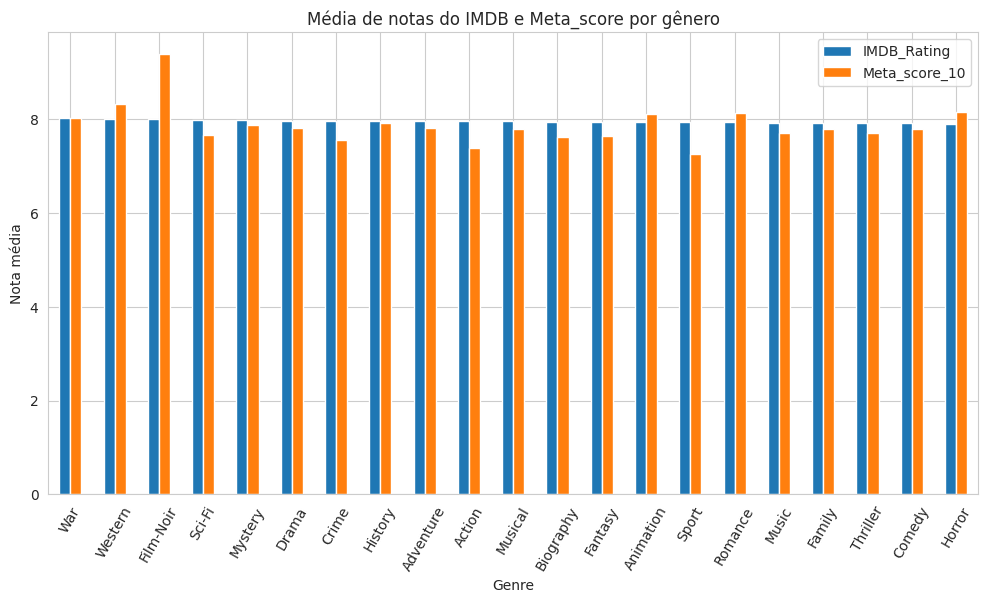

Top 5 gêneros por nota média:
            IMDB_Rating  Meta_score_10
Genre                                
War           8.013725       8.028889
Western       8.000000       8.310000
Film-Noir     7.989474       9.372727
Sci-Fi        7.977612       7.659677
Mystery       7.967677       7.876250


In [89]:
# Ajustando a escala da coluna Meta_score
df['Meta_score_10'] = df['Meta_score'] / 10

# Médias e medianas das variáveis
print()
print(f"Média IMDB: {round(df['IMDB_Rating'].mean(),1)}")
print(f"Mediana IMDB: {df['IMDB_Rating'].median()}")
print(f"Média Meta_score: {round(df['Meta_score_10'].mean(),1)}")
print(f"Mediana Meta_score: {df['Meta_score_10'].median()}")


# Médias de IMDB_Rating e Meta_score por gênero
media_genero.plot(kind='bar', figsize=(12,6))
plt.ylabel("Nota média")
plt.title("Média de notas do IMDB e Meta_score por gênero")
plt.xticks(rotation=60)
plt.show()

#Tabela com os 5 gêneros com maiores notas médias
generos = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
media_genero = generos.groupby('Genre')[['IMDB_Rating','Meta_score_10']].mean()
media_genero = media_genero.sort_values('IMDB_Rating', ascending=False)

print("Top 5 gêneros por nota média:\n", media_genero.head(5))


Os resultados mostraram que os cinco gêneros com maior nota média no IMDB foram: Guerra, Western, Film-Noir, Ficção Científica e Mistério, com médias próximas de 8,0.

Já as médias dos críticos (Meta_score) indicam que Film-Noir, Western e Animation receberam notas relativamente altas, chegando a valores acima de 9,0 em alguns casos.

De forma geral, observa-se que as diferenças entre a avaliação do usuário (IMDB) e dos críticos (Meta_score) não são grandes, mas alguns gêneros como Film-Noir e Animation são mais valorizados pelos críticos do que pelos usuários.

### Gêneros mais comuns nos filmes

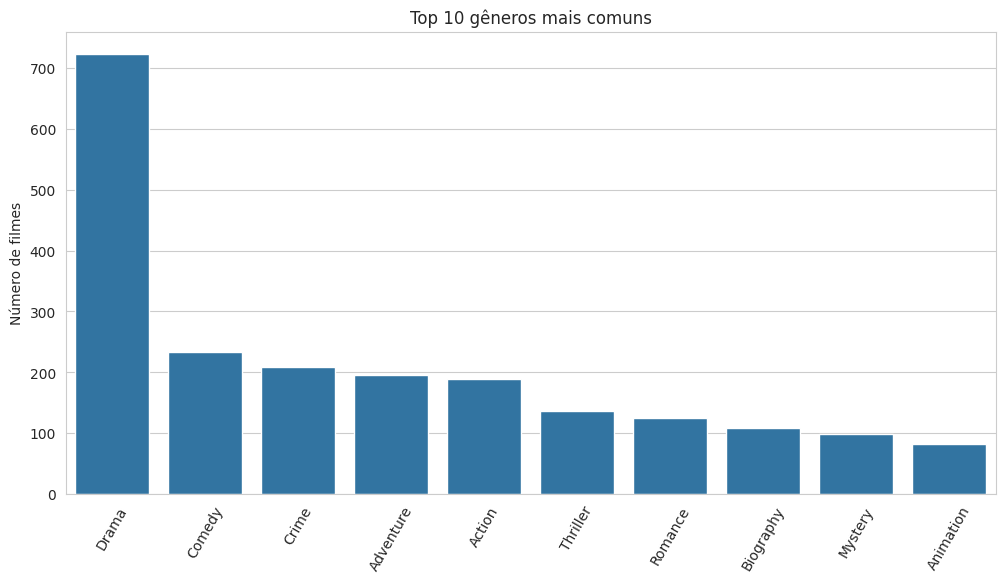

In [86]:
genero = df['Genre'].str.split(',').explode().str.strip()
contar_generos = genero.value_counts()

# Visualizar os 10 gêneros mais comuns
plt.figure(figsize=(12,6))
sns.barplot(x=contar_generos.head(10).index, y=contar_generos.head(10).values)
plt.xticks(rotation=60)
plt.ylabel("Número de filmes")
plt.xlabel("")
plt.title("Top 10 gêneros mais comuns")
plt.show()

A grande maioria dos filmes da base de dados inclui o gênero Drama em sua classificação, seguido por Comédia e Crime. Gêneros como Aventura, Ação e Suspense também aparecem com certa frequência. Entre os 10 principais, o gênero Animação é o que possui menor presença.

### Diretores e atores com mais filmes na base de dados

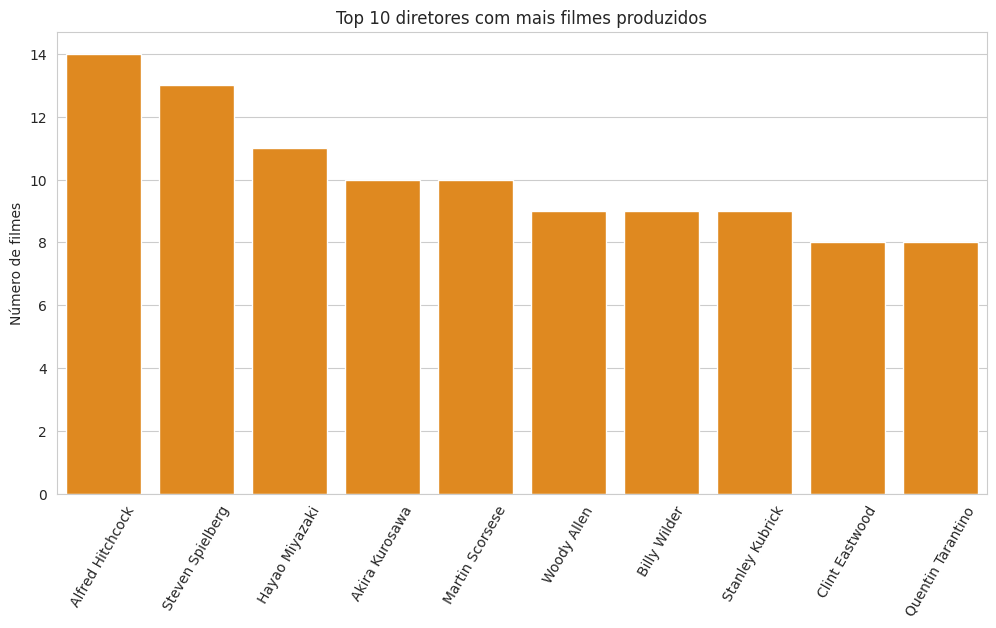

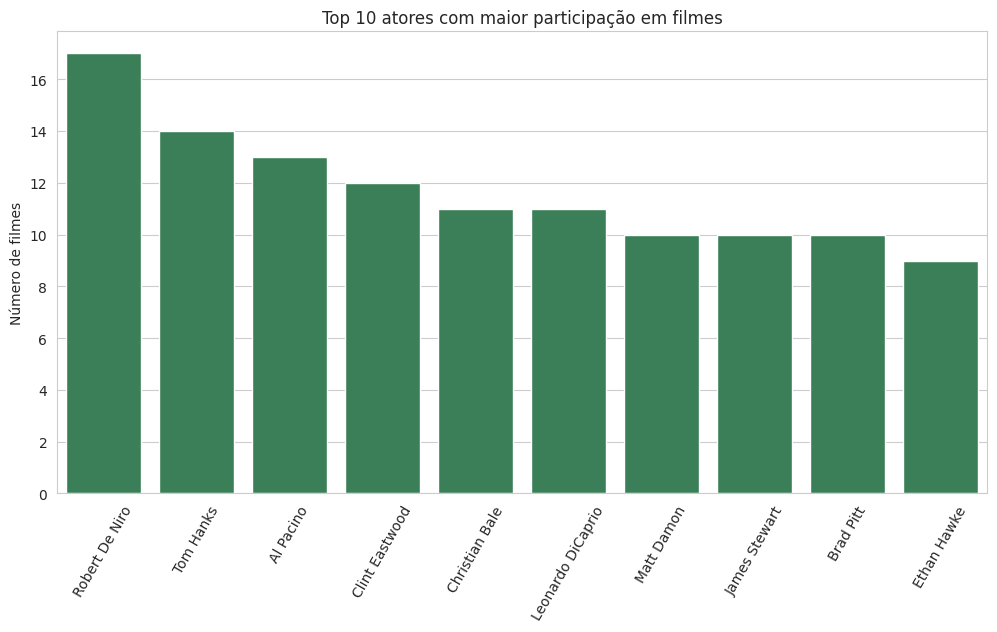

In [88]:
diretores = df['Director'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=diretores.head(10).index, y=diretores.head(10).values, color="darkorange")
plt.xticks(rotation=60)
plt.ylabel("Número de filmes")
plt.xlabel("")
plt.title("Top 10 diretores com mais filmes produzidos")
plt.show()

# Atores com mais participação em filmes do banco de dados
atores = pd.concat([df['Star1'], df['Star2'], df['Star3']])
contar_atores = atores.value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=contar_atores.head(10).index, y=contar_atores.head(10).values, color="seagreen")
plt.xticks(rotation=60)
plt.ylabel("Número de filmes")
plt.xlabel("")
plt.title("Top 10 atores com maior participação em filmes")
plt.show()


Entre os diretores com mais filmes na base de dados, destacam-se Alfred Hitchcock (14), Steven Spielberg (13) e Hayao Miyazaki (11), seguidos por nomes como Akira Kurosawa, Martin Scorsese e Woody Allen, cada um com cerca de 9 a 10 filmes.

Já entre os atores, Robert De Niro destacou-se com 17 participações, seguido por Tom Hanks (14) e Al Pacino (13). Outros atores de destaque incluem Clint Eastwood, Christian Bale e Leonardo DiCaprio, todos com mais de 10 filmes na base.

De forma geral, percebe-se que, tanto no caso dos diretores quanto dos atores, há uma concentração de alguns nomes com grande participação na produção dos filmes presentes no banco de dados.

### Análise entre notas do IMDB e faturamento
Hipótese: **Será que filmes bem avaliados no IMDB também faturam mais nas bilheteiras?** 

Imagino que filmes blockbusters podem ter notas altas e arrecadar muito, mas também existem filmes alternativos que recebem boas notas e não necessariamente têm grandes bilheterias.

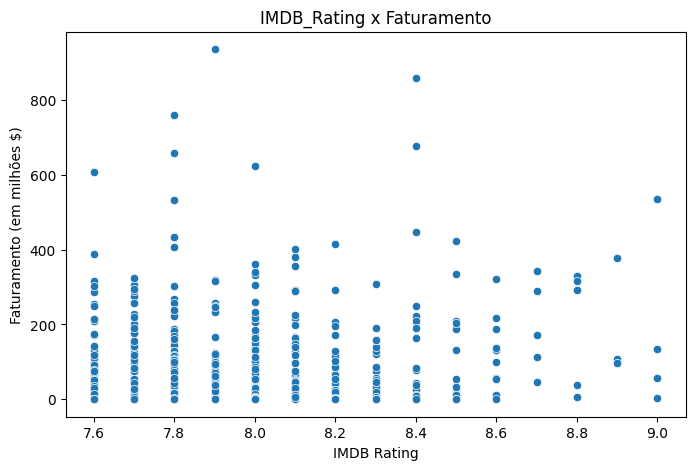

In [7]:
# Disperção das nota do IMDB sobre o faturamento
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='IMDB_Rating', y=df['Gross']/1000000)
plt.title("IMDB_Rating x Faturamento")
plt.xlabel("IMDB Rating")
plt.ylabel("Faturamento (em milhões $)")
plt.show()

In [8]:
# Correlação entre notas IMDB e faturamento
corr = df[['IMDB_Rating', 'Gross']].corr().iloc[0,1] 
print(f"Correlação Pearson: {corr:.2f}")

Correlação Pearson: 0.10


Analisando o gráfico de dispersão e a correlação Pearson com valor 0.10, observa-se que há pouca relação linear entre as duas variáveis. Assim, é possível afirmar que filmes com notas IMDB mais altas não necessariamente apresentam maior faturamento. Outras variáveis podem influenciar na arrecadação de um filme.

### Análise entre gênero e faturamento

Outra hipótese que acho válida: **Filmes de aventura e/ou ação geralmente são mais populares, então é possível que tenham um faturamento maior em comparação a outros gêneros.**

Abaixo está a análise gráfica que busca visualizar essa relação, mostrando o faturamento médio por gênero.

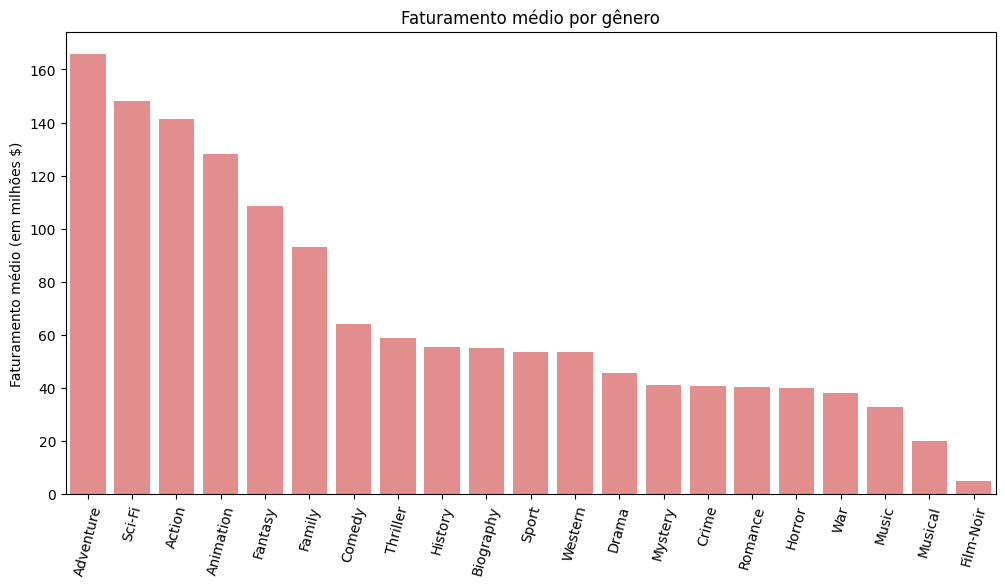

In [60]:
# Separa os gêneros que estão na mesma célula 
separar_generos = df.assign(Genre=df['Genre'].str.split(', '))
listar_generos = separar_generos.explode('Genre')

# Transforma o faturamento em milhões
listar_generos['Faturamento'] = listar_generos['Gross'] / 1000000

# Média de faturamento em milhões por gẽnero
faturamento_genero = listar_generos.groupby('Genre')['Faturamento'].mean().sort_values(ascending=False)

# Gráfico de faturamento médio por gênero
plt.figure(figsize=(12,6))
sns.barplot(x=faturamento_genero.index, y=faturamento_genero.values, color='lightcoral')
plt.xticks(rotation=75)
plt.ylabel("Faturamento médio (em milhões $)")
plt.xlabel("")
plt.title("Faturamento médio por gênero")
plt.show()

O gráfico evidencia que os gẽneros aventura, ficção científica e ação tem, em média, maior arrecadação do que os demais.
Geralmente filmes desses gêneros possuem maior produção e divulgação (marketing), o que pode explicar o faturamento final. 

### Análise entre classificação etária e faturamento

Hipótese: **Acredito que filmes indicados para todos os públicos possuem maior faturamento, enquanto os com classificação mais restrita podem ter um público menor e, consequentemente, arrecadação menor**.

O banco de dados apresenta vários tipos de classificação para a faixa etária. Pesquisando sobre elas, encontrei as seguintes definições:

- G - General Audiences, liberado para todos os públicos (EUA).

- GP - Classificação temporária nos EUA (entre 1968–1972), equivalente ao atual PG.

- PG - Parental Guidance Suggested, recomendado acompanhamento dos pais (EUA).

- PG-13 - Algumas cenas podem ser inapropriadas para menores de 13 anos (EUA).

- Approved - Sistema antigo do Production Code dos EUA (antes de 1968), significava "aprovado para todas as idades".

- Passed - Sistema antigo da Motion Picture Association, semelhante ao Approved (antes de 1968).

- R - Restricted, menores de 17 anos só acompanhados dos pais ou responsáveis (EUA).

- TV-PG - Classificação de TV, equivalente ao PG.

- U - Universal, apropriado para todos os públicos (usado no Reino Unido/Índia).

- U/A - Universal/Adult, todos podem assistir, mas menores de 12 anos devem estar acompanhados (Índia).

- UA - Igual ao U/A, usado em alguns bancos de dados (Índia).

- Unrated - Filme sem classificação oficial.

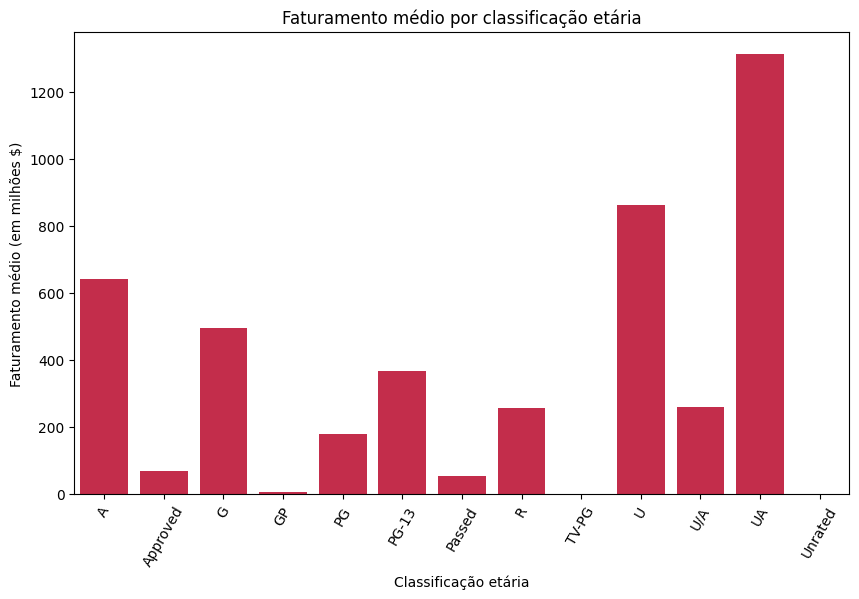

In [18]:
# Remover células ausentes das colunas Certificate e Gross
df_certificate = df[['Certificate', 'Gross']].dropna()

# Cálculo da média do faturamento pela classificação etária
faturamento_certificate = df_certificate.groupby('Certificate')['Gross'].mean() / 100000

plt.figure(figsize=(10,6))
sns.barplot(x=faturamento_certificate.index, y=faturamento_certificate.values, color="crimson")
plt.xticks(rotation=60)
plt.ylabel("Faturamento médio (em milhões $)")
plt.xlabel("Classificação etária")
plt.title("Faturamento médio por classificação etária")
plt.show()

O gráfico permite observar que filmes classificados como UA e U (comuns no mercado indiano) apresentam os maiores faturamentos médios no banco de dados, seguidos de perto pelos filmes A (adulto). As classificações utilizadas nos EUA, como PG, PG-13 e R, aparecem com valores médios bem menores.
Para uma afirmação mais concreta seria preciso um tratamento mais refinado dos dados ou inclusão de outras variáveis. No entanto, essa análise pode ser considerada um indicativo de que filmes classificados para todo público tendem a ter um maior faturamento. 

# Entrega 2

 **a) Qual filme você recomendaria para uma pessoa que você não conhece?**

Recomendar um filme para alguém desconhecido pode ser difícil, pois não temos informações sobre as predileções da pessoa. Diante disso, minha ideia seria escolher títulos que tivessem altas notas no IMDB e um grande número de votos dos usuários. Com essas duas variáveis seria possível escolher filmes de grande apelo popular como The Dark Night (nota IMDB: 9; e mais de dois milhões de votos), que pode ser adequado para uma recomendação a um inidíviuo desconhecido. Caso seja necessário refinar ainda mais a escolha, eu também aplicaria a variável Diretor dentro desse contexto, escolhendo assim filmes que tenham notas altas, muitos votos de usuários e dirigidos por diretores consagrados. 


**b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**

Pelo que analisei na entrega 1, os fatores que mais se destacam são o gênero e a classificação etária. Títulos de aventura, ficção científica e ação apresentaram maior arrecadação em relação a outros gêneros. A classificação etária também parece influenciar no faturamento. Produções com classificação para todos os públicos obtiveram o maior faturamento em comparação àquelas com classificação mais restritiva.

**c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

Através da coluna Overview é possível perceber a repetição de determinadas palavras nas sinopses de cada gênero. Esse padrão ajuda a identificar a temática de um filme.
Além disso, esses fatores permitem inferir o gênero a partir da sinopse, aplicando técnicas de Processamento de Linguagem Natural (NLP).

Abaixo, como exemplo, gerei uma nuvem de palavras simples para observar quais palavras são mais frequentes nas sinopses de filmes de ação. Essa visualização mostra quais termos aparecem com mais frequência, dando uma noção dos principais temas e possíveis insights.

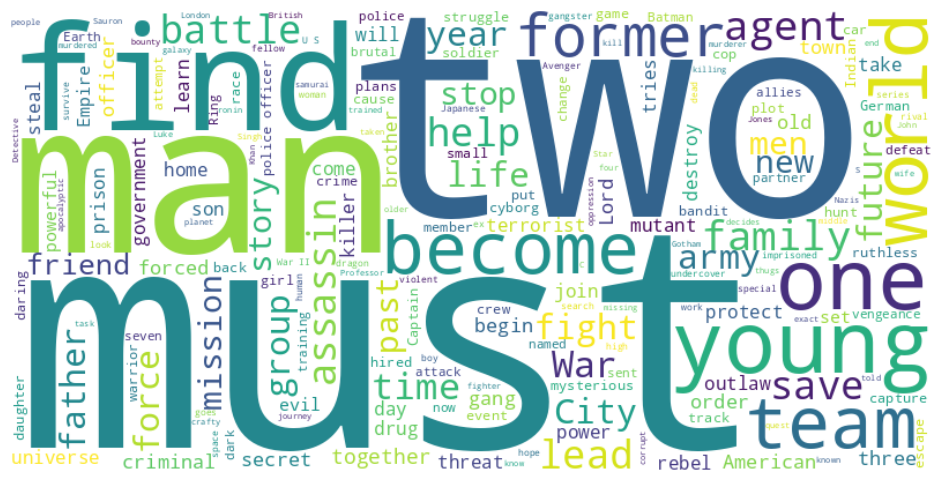

In [25]:
# Separa os gêneros (usando a variável listar_generos)
generos_texto = listar_generos[['Genre', 'Overview']].dropna()

# Concatena  as sinopses do gẽnero ação
texto_acao = " ".join(generos_texto[generos_texto['Genre'] == "Action"]['Overview'])
nuvem_acao = WordCloud(width=800, height=400, background_color="white").generate(texto_acao)

plt.figure(figsize=(12,6))
plt.imshow(nuvem_acao, interpolation="bilinear")
plt.axis("off")
plt.show()

# Entrega 3

Para realizar a previsão da nota do IMDB eu abordaria o problema como uma tarefa de regressão, uma vez que a variável é do tipo numérica.

Outras variáveis que considero ser relevantes para previsão são:

 - Released_Year: para capturar tendências ao longo do tempo.

 - Runtime: duração do filme, que pode ter correlação com a nota.

 - Meta_score: média consolidada das notas do críticos, que é passível de ser correlacionada com a variável notas do IMDB;

 - Gross (faturamento) e número de votos: podem ser utilizadas para medir a popularidade do filme.

Em relação ao modelo, acredito que o ideal seria iniciar com uma Regressão Linear para entender as correlações existentes, e ter uma base de como os dados interagem. Caso fosse necessário capturar relações mais complexas e não lineares, eu também consideraria o Random Forest. O ponto positivo do modelo linear é a facilidade de interpretação, porém o mesmo pode não identificar correlações mais complexas. Já o Random Forest tem como ponto positivo conseguir capturar essas relações mais profundas, no entanto possui menos transparência para interpretação dos resultados.

Para realizar a avaliação, o uso da métrica Root Mean Square Error (RMSE) pode ser a mais adequada, pois apresenta a mesma escala da nota do IMDB e penaliza os erros maiores, ajudando a ter uma visão mais precisa do modelo.


# Entrega 4

O código abaixo mostra como desenvolvi o modelo para estimar a nota do IMDb do filme *The Shawshank Redemption*.

In [28]:
import os
import joblib
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

load_dotenv()

df = pd.read_csv(os.getenv("DB_IMDB"), quotechar='"')

# Limpando os dados
# Tirar "min" e converter para float
df['Runtime'] = pd.to_numeric(df['Runtime'].astype(str).str.replace(" min", "", regex=False), errors='coerce')

# Tirar vírgulas e converter para float
df['Gross'] = pd.to_numeric(df['Gross'].astype(str).str.replace(",", "", regex=False), errors='coerce')

# Transformar para número
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')


# Colunas que serão utilizadas
X = df[['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']].copy()
y = df['IMDB_Rating'].copy()

# Transformar colunas de texto em número
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Remover linhas sem valores
X = X.dropna()
y = y.loc[X.index]

#  Realizar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Teste do modelo
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2:", r2)

# Prever a nota do IMDB do filme
shawshank = {
    'Released_Year': 1994,
    'Runtime': 142,
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Gross': 28341469
}

shawshank_df = pd.DataFrame([shawshank])
nota_pred = model.predict(shawshank_df)
print(f'Nota do IMDb: {nota_pred[0]}')

# Salva o modelo
joblib.dump(model, "modelo_nota_imdb.pkl")

RMSE: 0.19493713387657366
R2: 0.4585968411016009
Nota do IMDb: 9.28882369548217


['modelo_nota_imdb.pkl']


Para prever a nota do filme The Shawshank Redemption utilizei o conjunto de dados dos outros filmes para treinar um modelo simples de regressão linear, com base nas variáves Released_Year, Runtime, Meta_score, No_of_Votes e Gross.

Primeiro, transformei colunas de texto em números e retirei linhas com valores ausentes. Depois dividi os dados em dois grupos, um grupo para treinar o modelo e outro para testar o mesmo.

Como resultado, o modelo obteve um RMSE de 0.19 e um R² de 0.458.

A nota IMDB prevista foi de **9,28**.

Com base no resultado, o modelo fornece uma estimativa aproximada das notas reais, embora ainda haja margem para erro.

Acredito que o modelo poderia melhorar se eu incluísse outras variáveis, como Genre, Certificate, Director e Stars, mas precisaria de mais tempo para estudá-las e tratar os dados.
